# Data Collection and Preprocessing
## Data Sources
### Dataset 
The project be will using static data; dataset already available rather than real-time data from different sources. The data set we are going to use in this project has been sourced from Kaggle.
### Software Tools & Hardware Requirements 
Jupyter Notebook, & GoogleColab
Libraries : NumPy, Pandas, Matplotlib, Seaborn and  Scikit-Learn


# Data Description and Exploration
---



In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')

## Understanding Bank Customer Churn Prediction Dataset

### Explore the Churn Modelling dataset

---


In [49]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


#### The dataset is called the Bank Customers Churn dataset, and contains 14 variables.
Of the 14 variables, RowNumber, CustomerID and Surname; there are related to the personal data of the customers and these columns do not have any quantitative impact in the analysis. Hence, such columns can be remove and this leaves 11 variables to work with, of which Exited is our variable of interest.

In [7]:
df.drop(['RowNumber','CustomerId', 'Surname'], axis=1, inplace=True)

## Data Cleaning; Transformation & Feature Selection

This part of Data Preprocessing, which involves transforming raw data into a proper form for a better understandable format. The stages of Data Preprocessing involves:Data cleaning, Data integration, Data reduction, and Data transformation.

To have a sense of the data's format and content - let’s print the data summary and sample (first 5 entries; shape; size and info).

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


### Data shape
Allow to have an understanding dataset shape, and it is crucial in the data analysis and preprocessing:


In [10]:
df.shape

(10002, 11)

The dataset have :(10002, 14); meaning 10002 rows and 14 columns/features

### Data size
This gives an immediate sense of the dataset's volume, and  it is useful for understanding the scale of data you're working with.

In [11]:
df.size

110022

The dataset have : 140028 

### Data info
Describe a concise summary of a dataset, by providing essential information in term of a structure content of the dataset.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10002 non-null  int64  
 1   Geography        10001 non-null  object 
 2   Gender           10002 non-null  object 
 3   Age              10001 non-null  float64
 4   Tenure           10002 non-null  int64  
 5   Balance          10002 non-null  float64
 6   NumOfProducts    10002 non-null  int64  
 7   HasCrCard        10001 non-null  float64
 8   IsActiveMember   10001 non-null  float64
 9   EstimatedSalary  10002 non-null  float64
 10  Exited           10002 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 859.7+ KB


Overveiw and understanding the dataset

---



### Data Types:
This section aim to see the kind of data each column contains in the dataset
df.dtypes 🡪 Ref to Table 1 
### Missing Values : 
Handling missing values is a critical step in data preprocessing, particularly for a bank customer churn prediction.
df.isnull().sum()🡪Ref to Table 1; 
there is just 4 missing values, and since this may not affect the dataset, it can be ignore.


In [16]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
df.isnull().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

### Statistical Description of the Dataset: 
The function df.describe() 🡪 returns important descriptive statistical summaries focusing only on numerical columns, excluding NaN values (if available).
In our case the function, it gives an average balance (mean), the range of ages (min to max), and the spread out the customer tenure (std). 


In [51]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


## Exploratory Data Analysis (EDA)
This section is useful for understanding of data structure, relationships, as well as gaining insights valuable knowledge through data visualization. 
### Data Visualization
To have a better understanding of our dataset; different data visualization was plotted.
### Plotting the - Bank Customer Churn Pairplot
The pairplot - data visualization generates a comprehensive overview of how every numeric variable in the dataset relates to the others, alongside showing their individual distributions.


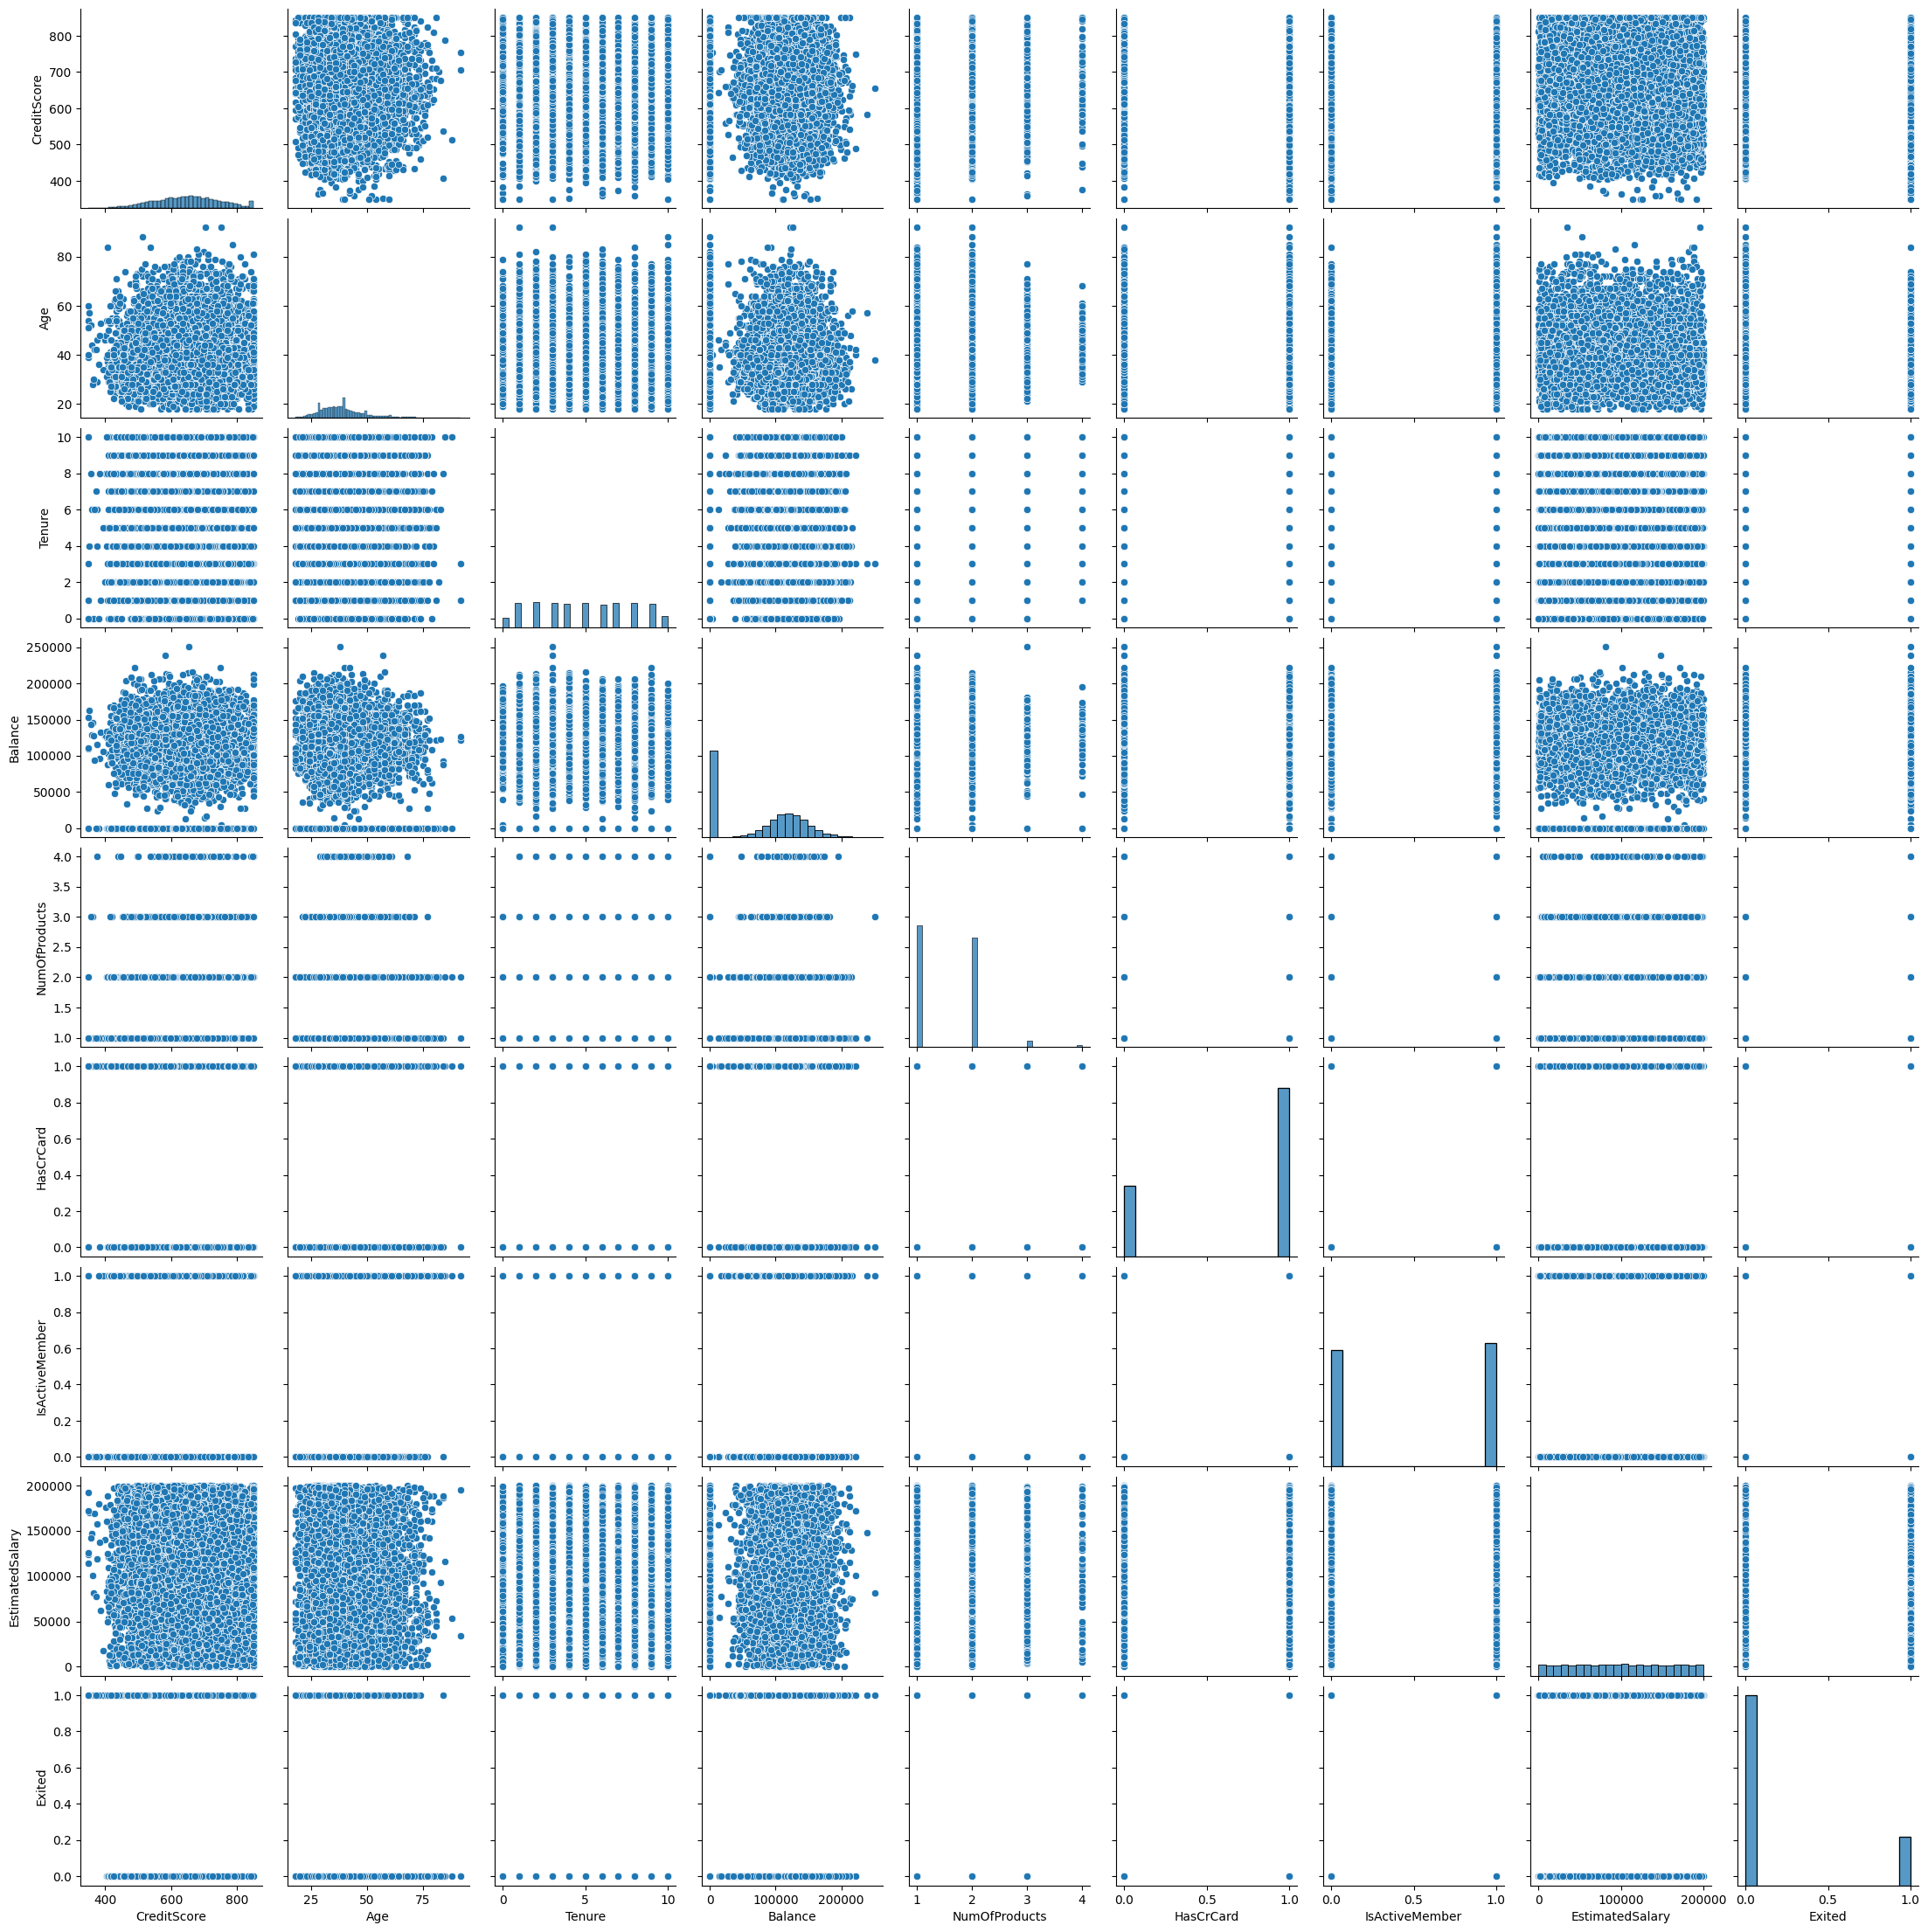

In [20]:
sns.pairplot(df)
plt.show()

### Countries; Exited and Countries vs Exited
The following graph shows how clients are split among the three European countires of Germany, France, and Spain; About 2,500 of the clients are from Spain; 2,500 are from Germany, and 5000 are from France.
The graph also shows that the bank lost more customers (churn rate) in Germany compared to the other countries. Additionally, Germany has the least amount of customers for its bank, but still more customers left the bank.
From the graph, it also shows that among the customers who left the bank, French and German customers have an equal number despite the fact that German customers are more likely to leave the bank than French and Spanish customers.

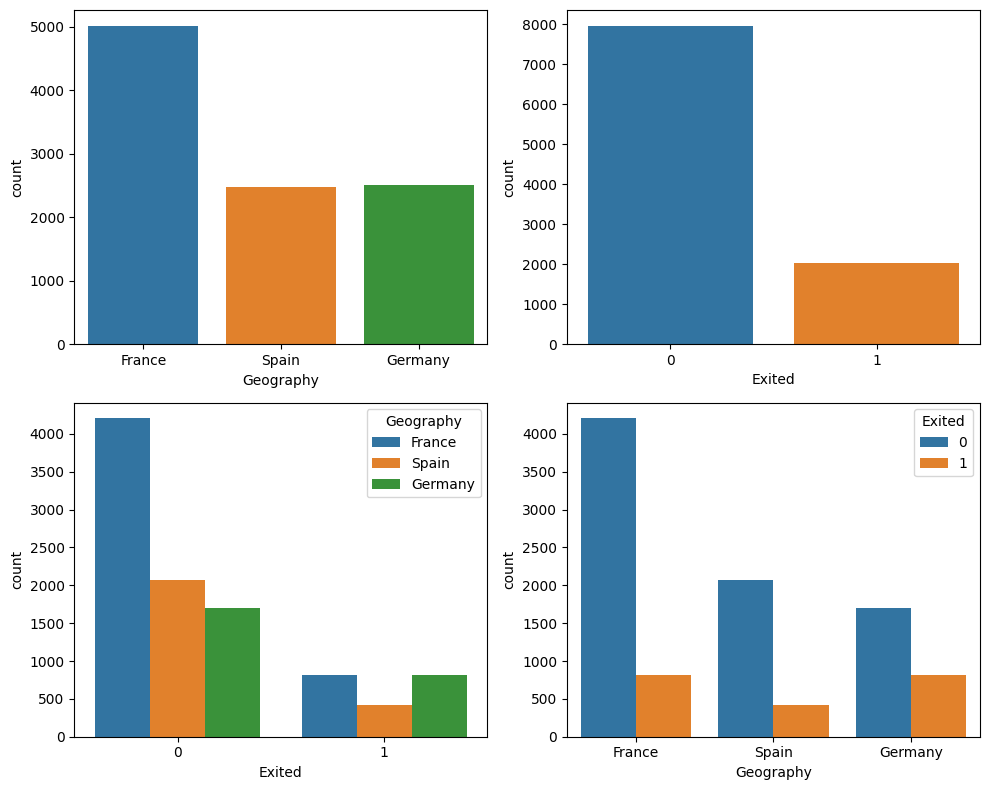

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Adjust the size as needed

sns.countplot(ax=axes[0, 0], x='Geography', data=df)
sns.countplot(ax=axes[0, 1], x='Exited', data=df)
sns.countplot(ax=axes[1, 0], x='Exited', hue='Geography', data=df)
sns.countplot(x='Geography', hue='Exited', data=df)

#counts = df.groupby(['Geography', 'Exited']).size().unstack()
#counts.plot(kind='bar', stacked=True, ax=axes[1, 1])

plt.tight_layout()
plt.show()

### Age & Churn Rate Percentage
In this section we want to understand the gender groups of the customers bank and see which gender seems likely to leave the bank.
The above pie chart summarizes the gender segmentation of users in these 3 different countries. From the pie chart, it be can see that 54.6% of users are male and the other 45.4% are females.
Figure 10 shows the churn rate in term of the gender.



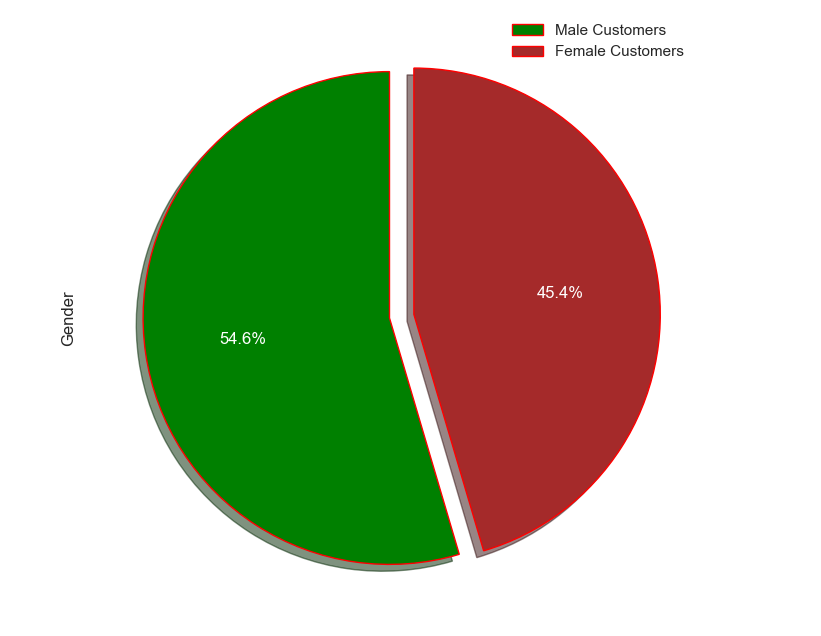

,Count
Male,5458
Female,4544


In [34]:
# Group Data By Gender - Pie plot
# The Pie chart summarizes the gender segmentation of users in these 3 different countries (With 55% of users as male and t45% as females).

sns.set_theme(style='whitegrid')
gender = pd.DataFrame(df['Gender'].value_counts())

# Pie Chart
explode = (0.0, 0.1)
colors = ['green', 'brown']
labels = 'Male Customers', 'Female Customers'
gender.plot.pie(y='Gender', figsize=(8,8), colors = colors,
                 autopct='%1.1f%%', textprops={'color':"w"}, explode=explode,
                 startangle=90, shadow=True, labels=labels, wedgeprops={'edgecolor': 'red'})
plt.show()
gender.columns = ["Count"]
gender

In [28]:
# Gender Churn Rate Analysis - Let us take a look at churn rates for both genders, and overall churn rate.

# from the result we cann see that - churn rate for female bank users (55.9%) is higher than that of males (44.1%).

total_churn = df.query('Exited == 1').count()["Exited"]

# Get Gender And Churn Status
# Female Churn
female_churn_number = df.query('Gender == "Female" & Exited == 1').count()["Exited"]
# Female Churn Rate
female_churn_rate = round((female_churn_number/total_churn)*100, 2)

# Male Churn
male_churn_number = df.query('Gender == "Male" & Exited == 1').count()["Exited"]
# Male Churn Rate
male_churn_rate = round((male_churn_number/total_churn)*100, 2)

# Create Churn Rate DataFrame
# Generate List of Lists
churn_data = [['Female', female_churn_rate], ['Male', male_churn_rate]]

# Create the Pandas DataFrame
churn_df = pd.DataFrame(churn_data, columns = ["Gender", "Churn Rate (%)"])
churn_df

,Gender,Churn Rate (%)
0,Female,55.89
1,Male,44.11


### Age Segmentation Analysis
Referring to the age segmentation; we create the customers age groups dataset such as :
youth = df.query('Age >= 18 and Age <= 24')
adult = df.query('Age >= 25 and Age <= 64')
senior = df.query('Age >= 65')
From this data visualization; it can be seen that - the middle-aged group (roughly between 35 and 55) has the highest number of probability to churned among the other age, and the young and seniors people seem less likely to leave the bank.



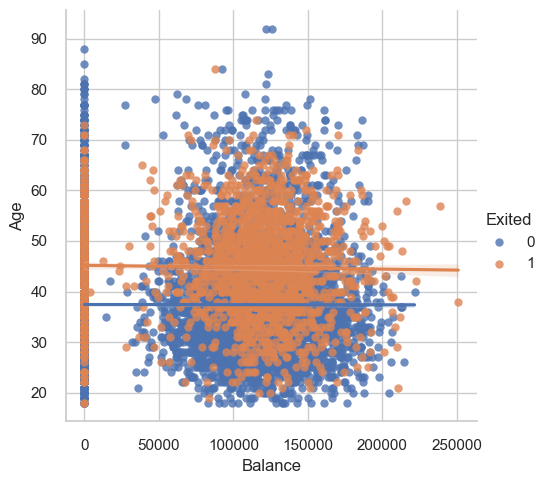

In [35]:
# ALternative plot Age Segmentation Analysis - Plot showing the age of people leaving the bank

sns.lmplot(x='Balance',y='Age',hue='Exited',data=df)

#Thus old people above 45 are tends to exite more than young people below 45.
# People (between 25 and 64) have a higher probability to leave the bank

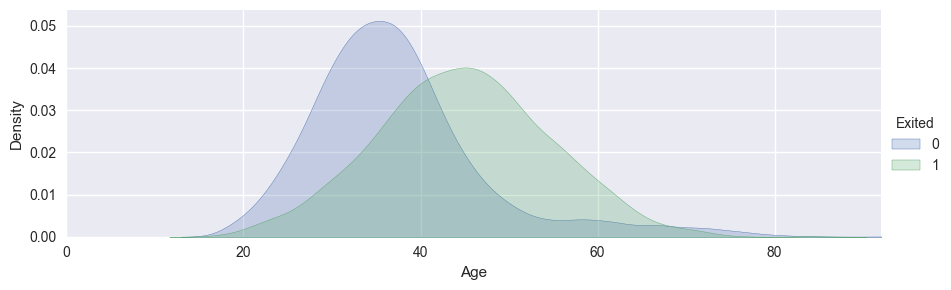

In [30]:
# Age Segmentation Analysis - Plot showing the age of people leaving the bank
# Note : Young people and seniors seem less likely to leave the bank &  Adults (between 25 and 64) have a higher probability to leave the bank

facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",fill= True)
facet.set(xlim=(0, df["Age"].max()))
facet.add_legend()

plt.show()

### Understanding - Credit Analysis
To define the credit score we made use of the FICO ranges, with the following approach:

Score of 720 or higher → mean excellent credit;
Score of 690 and 719 → mean good credit;
Scores between 630 and 689 → Fair credit; and Scores below 629 → Poor credit.

From our dataset analysis; There is the following credit score (CS):
2362 customers → very poor CS;
3331 customers → fair credit CS;
2428 customers → good CS.
1226 customers → very good CS and 655 customers → exceptional CS.

To learn about the relationship between Credit Score and the Exiting, below plot was created. It shows that most customers who exited the bank had very poor and fair credit score.



In [36]:
very_poor = df.query('CreditScore >= 300 and CreditScore <= 579')#.count()
fair = df.query('CreditScore >= 580 and CreditScore <= 669')#["CreditScore"]#.max()#.count()
good = df.query('CreditScore >= 670 and CreditScore <= 739')#.count()
very_good = df.query('CreditScore >= 740 and CreditScore <= 799')#.count()
exceptional = df.query('CreditScore >= 800 and CreditScore <= 850')#.count()

# Print Number of Customers in different FICO Score Ranges
print("There are", very_poor["CreditScore"].count(), "customers with very poor credit score.")
print("There are", fair["CreditScore"].count(), "customers with fair credit score.")
print("There are", good["CreditScore"].count(), "customers with good credit score.")
print("There are", very_good["CreditScore"].count(), "customers with very good credit score.")
print("There are", exceptional["CreditScore"].count(), "customers with exceptional credit score.")

There are 2362 customers with very poor credit score.
There are 3331 customers with fair credit score.
There are 2428 customers with good credit score.
There are 1226 customers with very good credit score.
There are 655 customers with exceptional credit score.


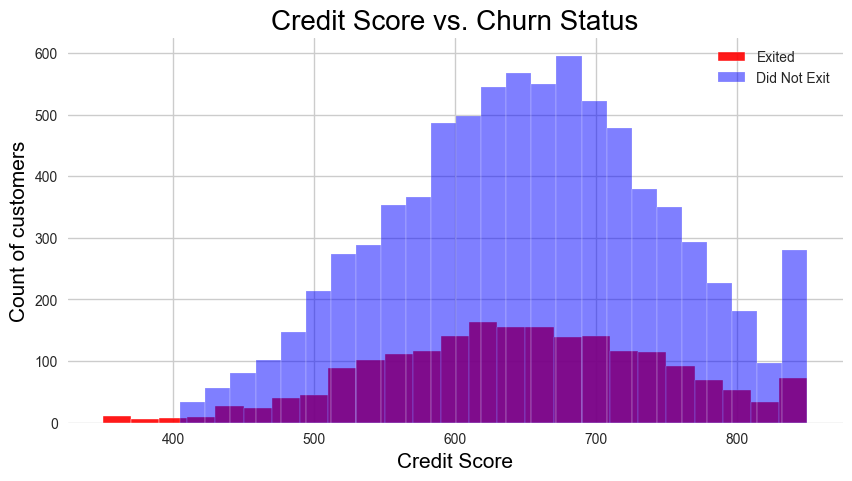

In [38]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))

plt.hist(df[df["Exited"]==1]["CreditScore"], bins=25, alpha=0.9, color="red", label="Exited")
plt.hist(df[df["Exited"]==0]["CreditScore"], bins=25, alpha=0.5, color="blue", label="Did Not Exit")

plt.xlabel("Credit Score", size = 15, color = "black")
plt.ylabel("Count of customers", size = 15, color = "black")
plt.title("Credit Score vs. Churn Status", color="Black",  size = 20)
plt.legend();

### Customers Retained and the Churn Rate
From the graph it can see that the number of churn bank customer is about 20% (20.4% out of 100%) and retained about 80%(79.6% customers out of 100%).
Our goal is to predict churn rate, so it is important that whatever model we choose at the end predicts this 20%.

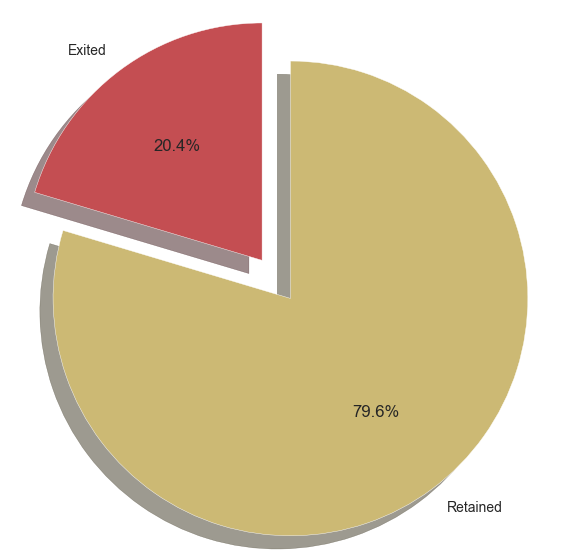

In [39]:
# Pie chart displaying the amount (percentage) of customers churned and the ones retained

plt.figure(figsize=(7,7))
labels = ['Exited', 'Retained']
sizes = [df.Exited[df['Exited'] == 1].count(), df.Exited[df['Exited'] == 0].count()]
explode = [0.1, 0]

# create and plot the pie chart

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, radius=0.5, colors=['r', 'y'], )
# plt.title("Percentage of customers exited and retained", size = 20)
plt.axis('equal')
plt.show()

### Count Plots to Map the Dependence of 'Exited' column on Categorical Features.
•
Geography: This was already discuss and does validate our argument – referring to figure 5 and the comments

•
Gender: It can be seen that the Female customers had more exits compare to the male customers.

•
Credit cards: This shows that people who have credit cards exits more than those who do not have credit cards.

•
Active Member: Demonstrate that inactive members have been churned more than members who are active.

•
Number of Products: Customers who own more products from the bank are likely to be retained for a longer time than those who own less products.

•
Tenure: The graph shows that new joined (less than a year) and older people (10 years) have an overall less number of retained customer. However, there may be more likely to be churned because of their churn rate (percentage) is being higher than other tenure rates..


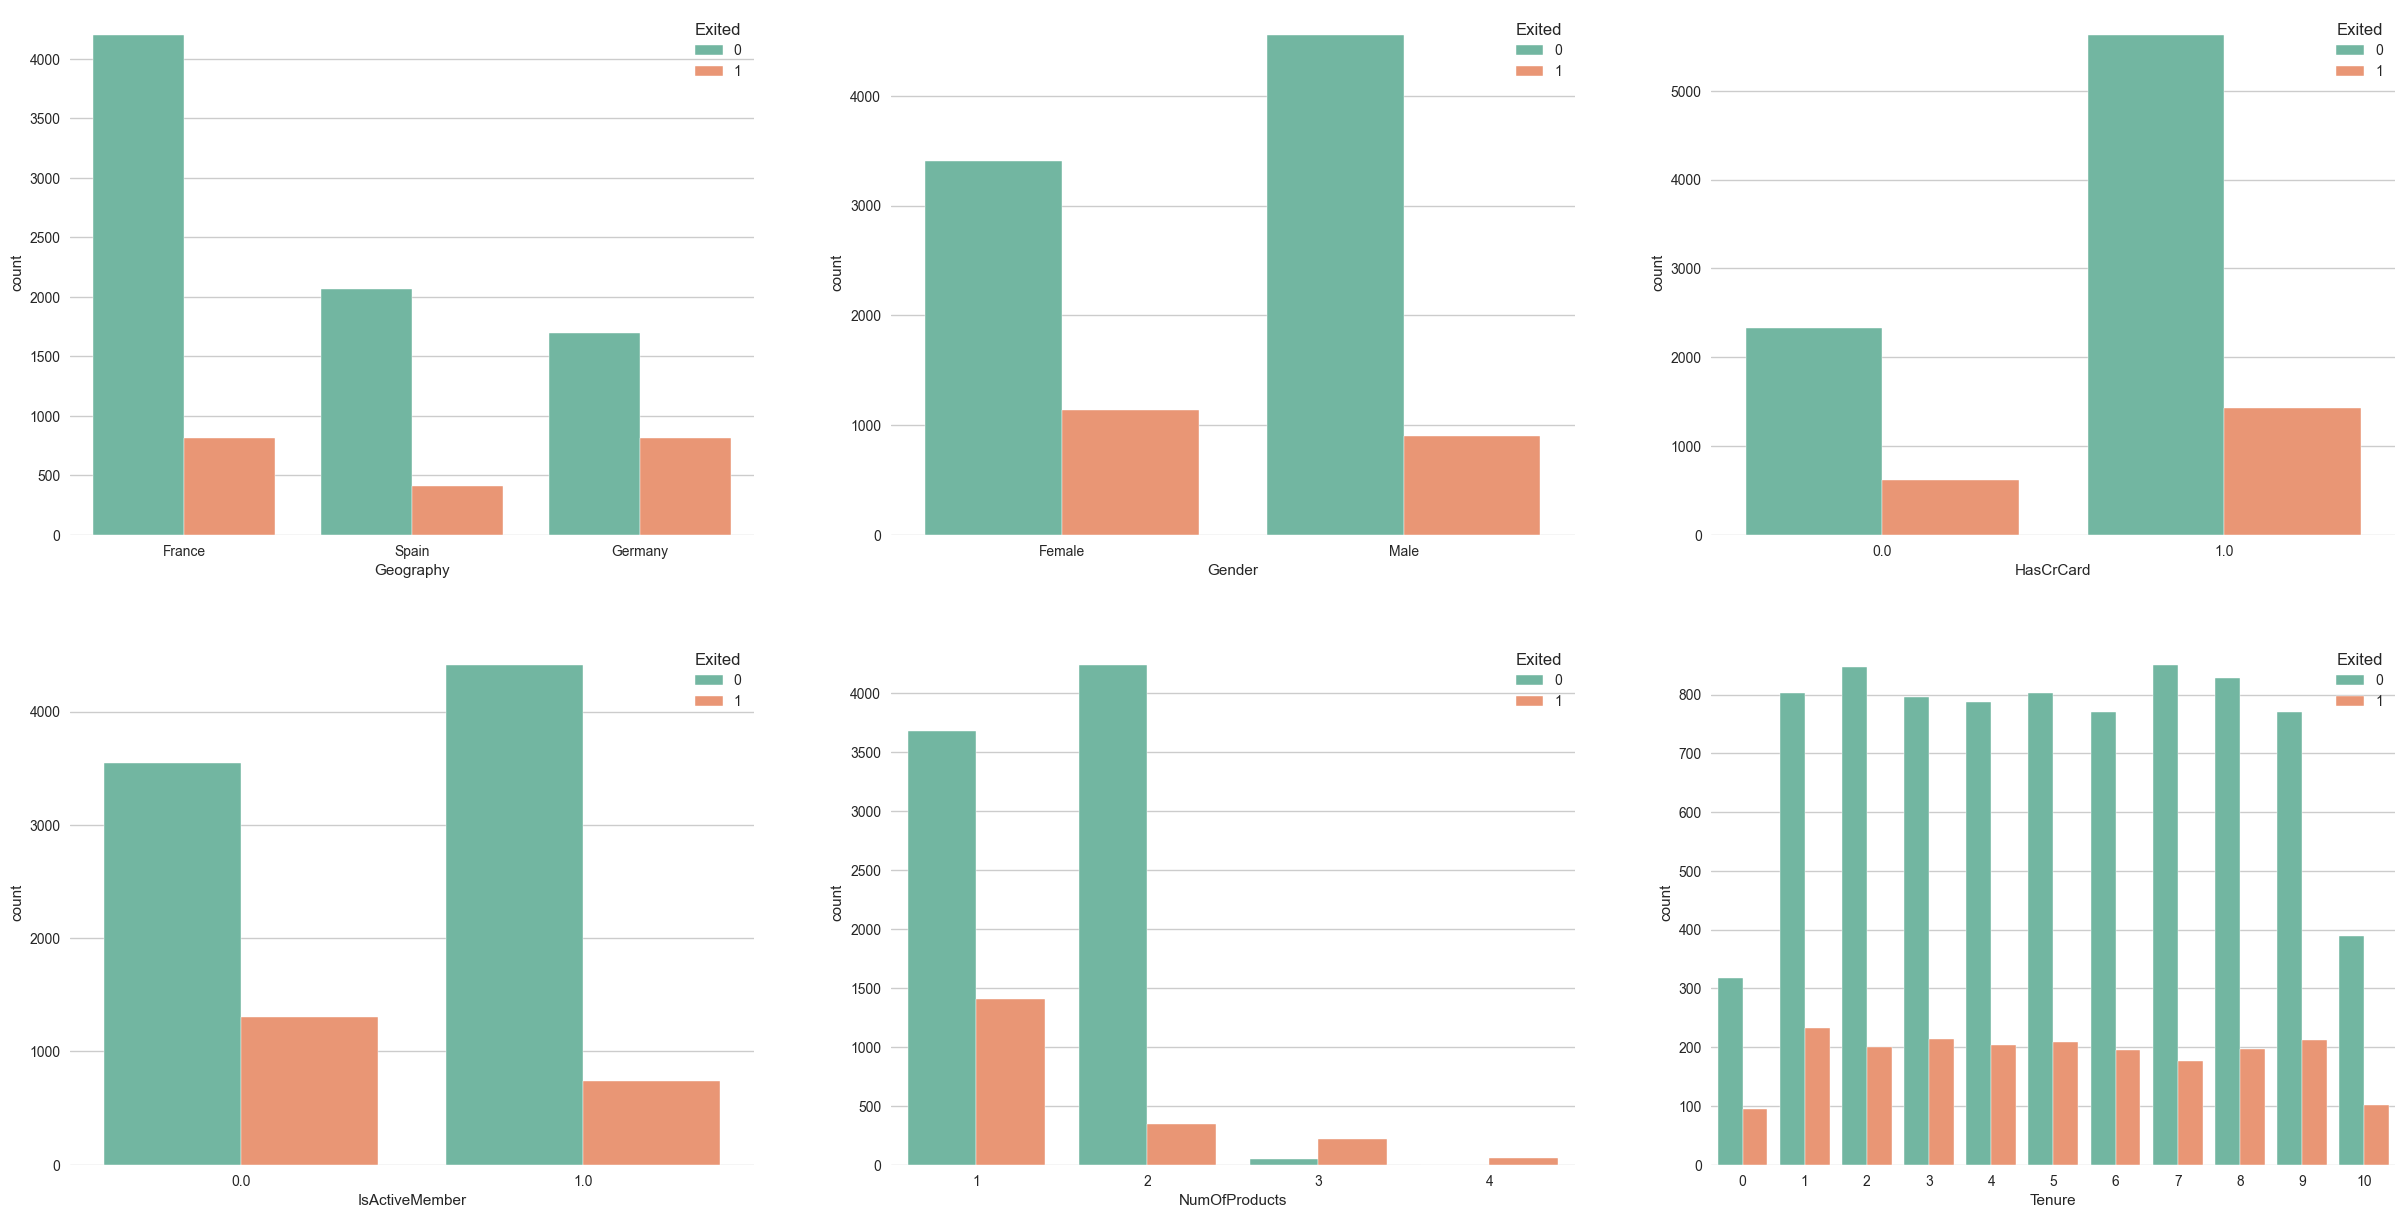

In [40]:
# Count column plots to map the dependence of 'Exited' column on categorical features

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.countplot(x='Geography', hue='Exited', data=df, palette='Set2', ax=ax[0][0])
sns.countplot(x='Gender', hue='Exited', data=df, palette='Set2', ax=ax[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=df, palette='Set2', ax=ax[0][2])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette='Set2', ax=ax[1][0])
sns.countplot(x='NumOfProducts', hue='Exited', data=df, palette='Set2', ax=ax[1][1])
sns.countplot(x='Tenure', hue='Exited', data=df, palette='Set2', ax=ax[1][2])

plt.show()

### Summary - Plots to Map the Dependence of 'Exited’ column on Continuous and Numerical Features.

•
Credit Score: The graph shows the Credit Score does not have much effect on the customer churn.

•
Age: Referred to figure 7. This is confirm how previous analysis. It shows that the middle age (between 35 & 50) customers are more likely to be churned from the bank

•
Balance: When it comes to Balance, we see that the bank is losing a significant number of customers with high balance in their accounts.

•
Estimated Salary: Estimated Salary does not seem to affect the customer churn much.

•
Number of Products: We see that the number of products also does not seem to affect the customer churn.

•
Tenure: It can the seen from the graph that customer belonging more to the two extreme tenure groups - new joiners and older ones have a higher chance of experiencing churned.


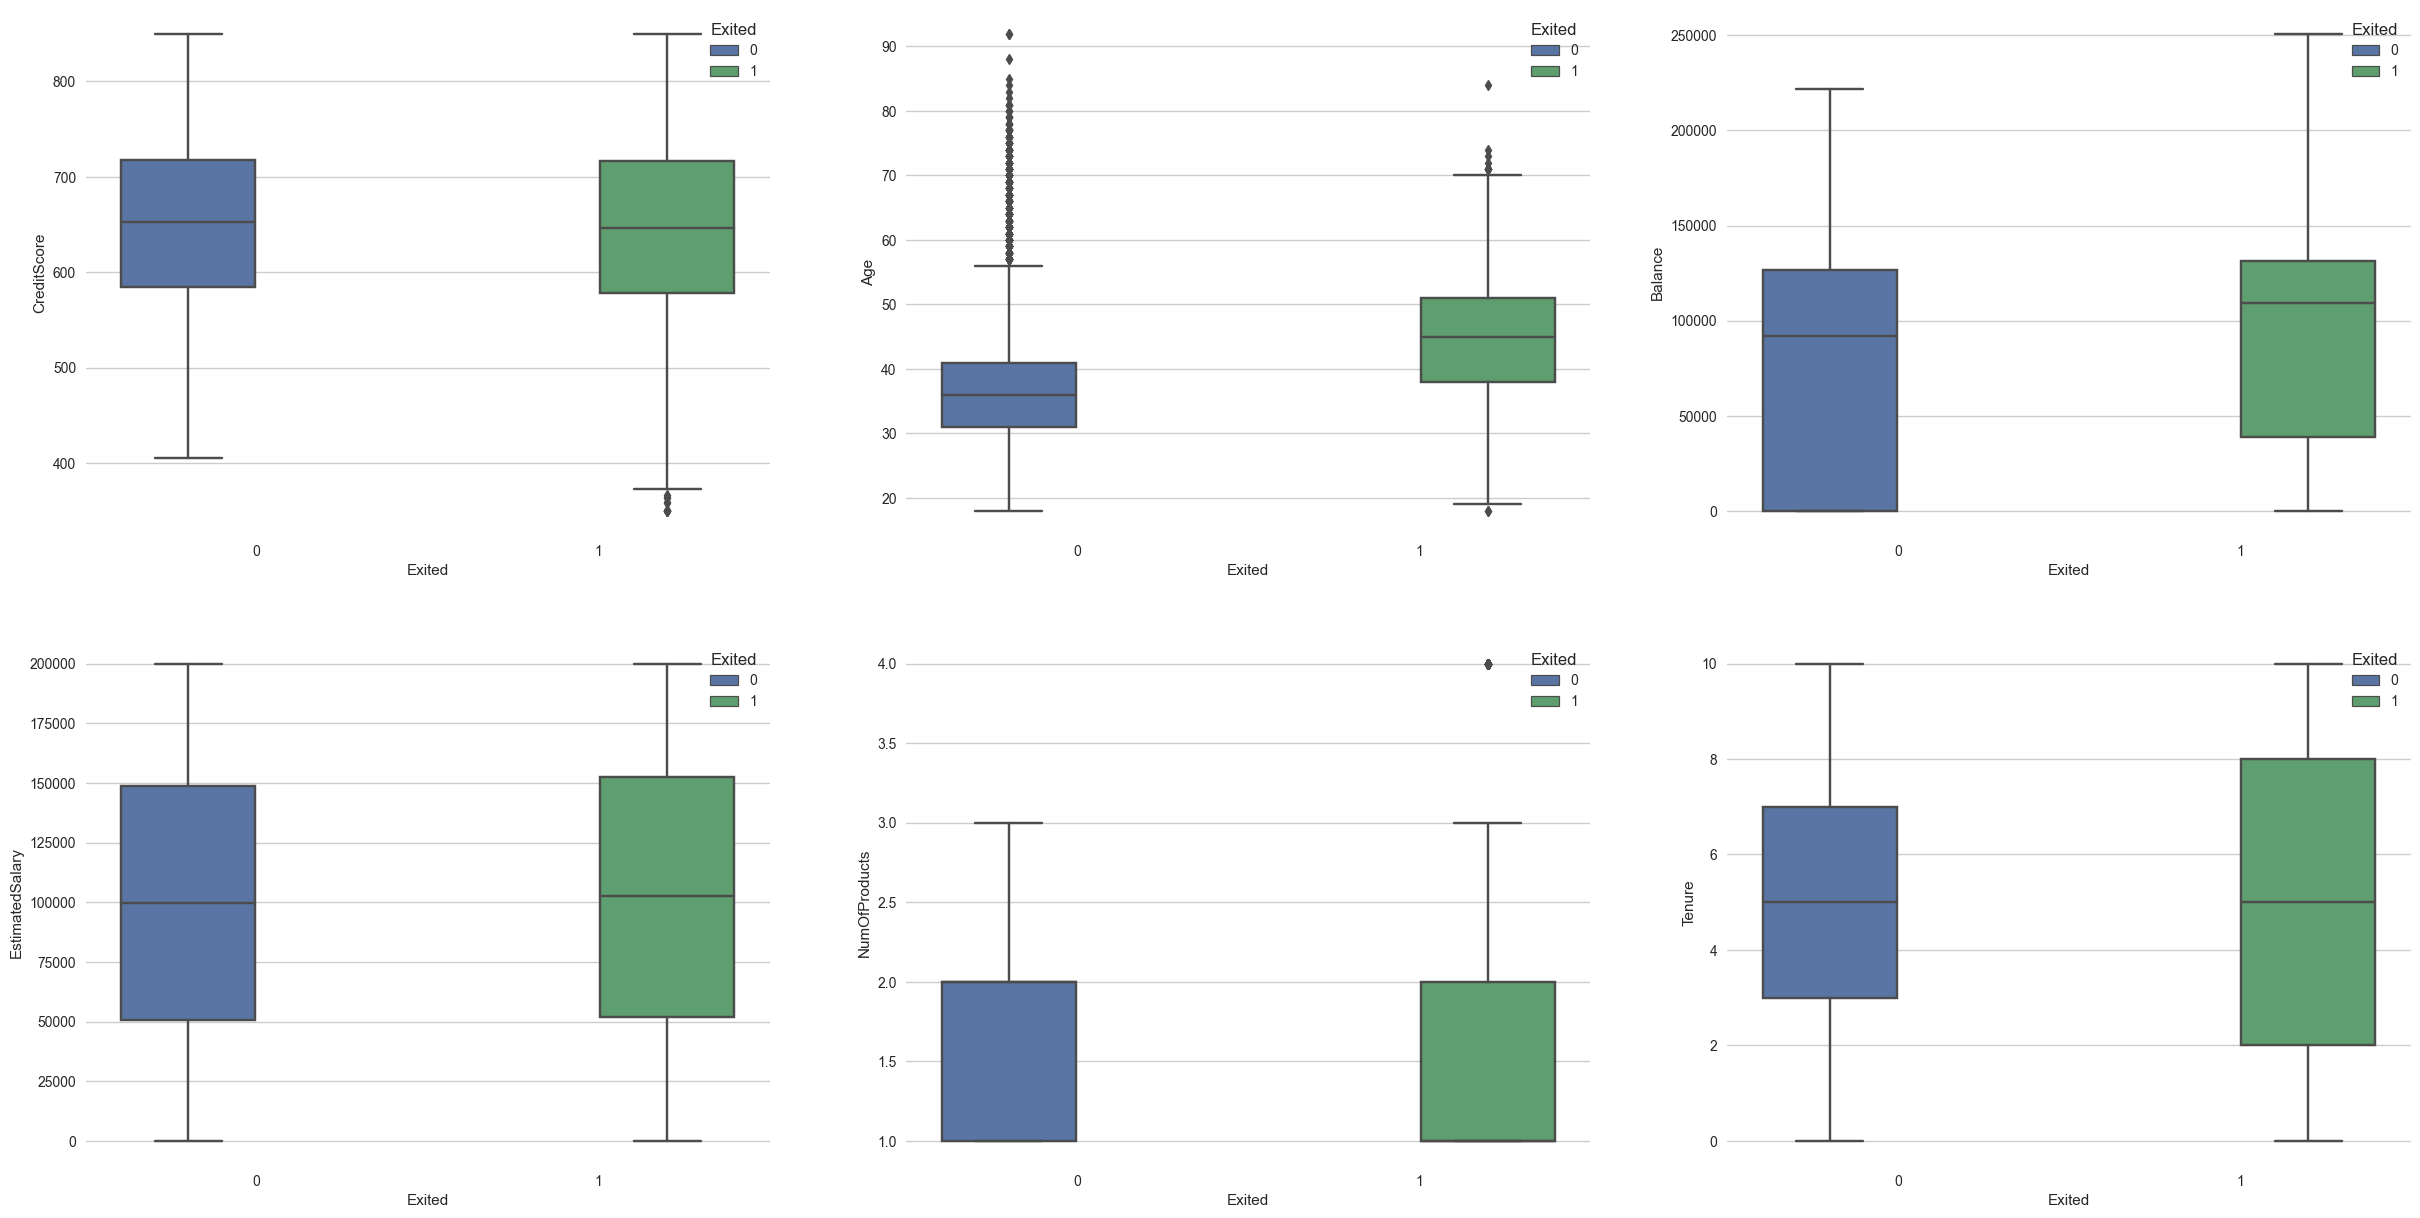

In [41]:
# Plots to map the dependence of 'Exited'Column on continuous and numerical features

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.boxplot(data=df, x='Exited', y='CreditScore', hue='Exited', ax=ax[0][0])
sns.boxplot(data=df, x='Exited', y='Age', hue='Exited', ax=ax[0][1])
sns.boxplot(data=df, x='Exited', y='Balance', hue='Exited', ax=ax[0][2])
sns.boxplot(data=df, x='Exited', y='EstimatedSalary', hue='Exited', ax=ax[1][0])
sns.boxplot(data=df, x='Exited', y='NumOfProducts', hue='Exited', ax=ax[1][1])
sns.boxplot(data=df, x='Exited', y='Tenure', hue='Exited', ax=ax[1][2])

plt.show()

### Correlation Analysis
The correlation analysis can be used to describe the relationship between several numerical variables and identify irregularities and patterns.
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
The graph shows that there are not many features that are strongly correlated linearly with the target. This indicates that the majority of the dataset's correlations are non-linear.

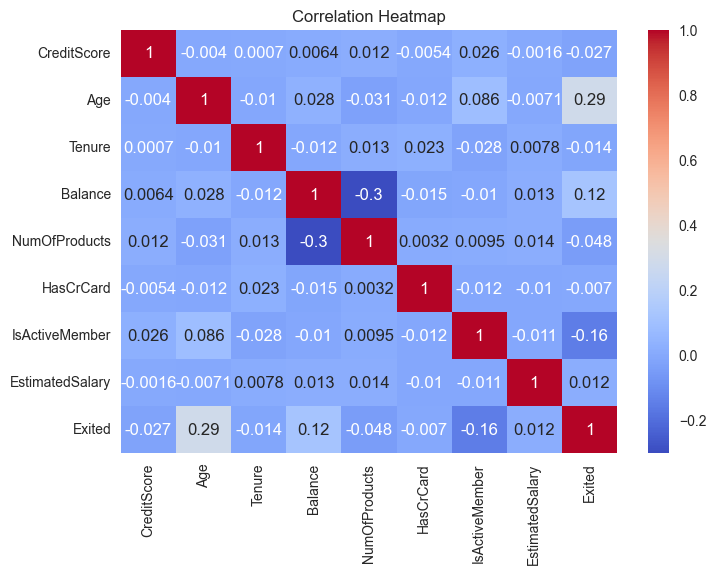

In [44]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Model Development
### Train/Test Split
The approach of this section is to assess a model's performance by estimating how well it should function in real-world scenarios. The dataset is divided into (1) training data for training the model how to get the desired results and (2) test data for testing the prediction to determine whether or not the machine is generating the required or intended results. A percentage of 80% and 20% was considered for the training data and test data respectively.

In [46]:
# 80 % data for modelling & remaining 20% for,testing
data = df.sample(frac=0.80, random_state=888).reset_index(drop=True)
testData = df.drop(data.index).reset_index(drop=True)

print ('Data for Modeling: ', str(data.shape))
print('Unseen Data for predictions: '+ str(testData.shape))

Data for Modeling:  (8002, 11)
Unseen Data for predictions: (2000, 11)


### Model Training Environment
PyCaret open-source was use, which is a low-code machine learning library that aims to reduce the complexity of building and deploying machine learning models. To Setting up the Environment, we have to specified the dataset and target variable, excludes irrelevant features for the prediction, ensures reproducibility, and addresses class imbalance using SMOTE.

In [60]:
Installing Pycaret - full version
pip install pycaret[full]
pip install scipy

In [48]:
#Initialization and Setting Up the Environment
from pycaret.classification import *
clf1= setup(data = data,
            target = 'Exited',
            session_id=123,
            ignore_features=['CustomerId', 'Surname'],
            fix_imbalance_method = 'SMOTE')

,Description,Value
0,Session id,123
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(8002, 11)"
4,Transformed data shape,"(8002, 13)"
5,Transformed train set shape,"(5601, 13)"
6,Transformed test set shape,"(2401, 13)"
7,Ignore features,2
8,Ordinal features,1
9,Numeric features,8


### Compare different Model
This section aim to compare several models and selecting the model that is best suited for dataset. To choose the model to adapt adapted to the dataset. The following evaluation metrics were considered relevant to evaluate the performance of the model: precision, accuracy, recall, auc, f1_score, etc…
Referring to the table below the first models chosen was the fr, then gbc, lightgbm, and then follow by others models.

In [49]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8577,0.8605,0.4622,0.7520,0.5714,0.4920,0.5135,0.1740
rf,Random Forest Classifier,0.8561,0.8488,0.4526,0.7537,0.5640,0.4842,0.5076,0.1390
lightgbm,Light Gradient Boosting Machine,0.8550,0.8557,0.4987,0.7121,0.5856,0.5011,0.5134,0.0890
ada,Ada Boost Classifier,0.8518,0.8406,0.4622,0.7178,0.5615,0.4774,0.4946,0.0760
et,Extra Trees Classifier,0.8513,0.8475,0.4283,0.7403,0.5415,0.4604,0.4855,0.0950
ridge,Ridge Classifier,0.8072,0.0000,0.1347,0.6505,0.2221,0.1635,0.2311,0.0180
lda,Linear Discriminant Analysis,0.8045,0.7656,0.2346,0.5594,0.3293,0.2371,0.2683,0.0210
dummy,Dummy Classifier,0.7945,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0170
lr,Logistic Regression,0.7863,0.6658,0.0504,0.3577,0.0878,0.0395,0.0648,0.4770
dt,Decision Tree Classifier,0.7845,0.6866,0.5204,0.4779,0.4979,0.3611,0.3619,0.0220


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Modelling
In churn analysis, the main goal is to identify customers who are likely to churn so that appropriate actions can be taken to retain them. The best model is the one that can generate the most correct predictions
From model experimentation, we had consider the rf, gbc, and 'lightgbm'; Base on prior knowledge from the comparison of different model.


In [53]:
best_model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8645,0.8586,0.4483,0.8125,0.5778,0.5050,0.5367
1,0.8464,0.8670,0.4522,0.6933,0.5474,0.4598,0.4750
2,0.8786,0.8581,0.5043,0.8406,0.6304,0.5632,0.5895
3,0.8643,0.8513,0.4870,0.7671,0.5957,0.5190,0.5384
4,0.8714,0.8964,0.5130,0.7867,0.6211,0.5477,0.5659
5,0.8411,0.8539,0.4609,0.6625,0.5436,0.4511,0.4620
6,0.8643,0.8562,0.4261,0.8305,0.5632,0.4925,0.5311
7,0.8768,0.8957,0.5391,0.7949,0.6425,0.5713,0.5871
8,0.8446,0.8395,0.4087,0.7121,0.5193,0.4347,0.4585


In [54]:
best_model2 = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8681,0.8453,0.4569,0.8281,0.5889,0.5180,0.5506
1,0.8500,0.8650,0.4870,0.6914,0.5714,0.4838,0.4947
2,0.8732,0.8624,0.4609,0.8548,0.5989,0.5315,0.5673
3,0.8625,0.8236,0.4609,0.7794,0.5792,0.5035,0.5283
4,0.8518,0.8597,0.4783,0.7051,0.5699,0.4844,0.4977
5,0.8500,0.8530,0.4522,0.7123,0.5532,0.4684,0.4859
6,0.8607,0.8629,0.4000,0.8364,0.5412,0.4709,0.5155
7,0.8643,0.8751,0.4783,0.7746,0.5914,0.5154,0.5370
8,0.8571,0.8323,0.4609,0.7465,0.5699,0.4899,0.5104


In [55]:
best_model3 = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8503,0.8555,0.4655,0.7105,0.5625,0.4769,0.4924
1,0.8500,0.8539,0.4957,0.6867,0.5758,0.4875,0.4971
2,0.8750,0.8537,0.5304,0.7922,0.6354,0.5635,0.5800
3,0.8643,0.8371,0.5391,0.7294,0.6200,0.5396,0.5488
4,0.8536,0.8770,0.4870,0.7089,0.5773,0.4924,0.5051
5,0.8589,0.8696,0.5217,0.7143,0.6030,0.5198,0.5292
6,0.8643,0.8652,0.4696,0.7826,0.5870,0.5118,0.5357
7,0.8607,0.8906,0.5652,0.6989,0.6250,0.5406,0.5452
8,0.8500,0.8330,0.4609,0.7067,0.5579,0.4723,0.4880


### Performance Metrics (AUC-ROC, Accuracy, Precision, etc,…)
Performance metrics aim to understanding how well a model can perform, and this is measure by their effectiveness, reliability and the performance of a model (Training and Testing).


In [56]:
predictions = predict_model(best_model, data=testData)
print(predictions.columns)

predictions2 = predict_model(best_model2, data=testData)
print(predictions2.columns)

predictions3 = predict_model(best_model3, data=testData)
print(predictions3.columns)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8650,0.8720,0.4578,0.7553,0.5701,0.4956,0.5175


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'prediction_label', 'prediction_score'],
      dtype='object')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9350,0.9474,0.7391,0.9117,0.8164,0.7774,0.7837


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'prediction_label', 'prediction_score'],
      dtype='object')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9015,0.9163,0.6138,0.8392,0.7090,0.6514,0.6630


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'prediction_label', 'prediction_score'],
      dtype='object')


------------------
The best model is selected from the model that produces the highest accuracy, precision and average recall value for the test data. Based on the table below, the selected model is **Random Forest Classifier** with an **Accuracy of 0.9350** and **average recall for the testing data of 0.7315**.

### Using testdata to test the model
Test data serves as a stand-in for real-world data, helping to gauge how well a model will perform in practice.


In [57]:
testData['Predicted Exited'] = predictions2['prediction_label']

In [58]:
testData

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Predicted Exited
0,590,Spain,Male,37.0,1,0.00,2,0.0,0.0,133535.99,0,0
1,603,Spain,Male,57.0,6,105000.85,2,1.0,1.0,87412.24,1,0
2,615,France,Male,45.0,5,0.00,2,1.0,1.0,164886.64,0,0
3,634,France,Female,36.0,1,69518.95,1,1.0,0.0,116238.39,0,0
4,716,Germany,Male,41.0,8,126145.54,2,1.0,1.0,138051.19,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1,0
1996,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1,1
1997,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1,1
1998,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0,0


## Analyze Model 
### Confusion Matrix 
A Confusion Matrix contains information about actual and predicted classifications done by a classification system. The Confusion Matrix has four categories: True positives (TP) refer to correctly labeled as positives; False positives (FP) refer to negative and incorrectly labeled as positive; True negatives (TN) correspond to negatives and correctly labeled as negative; False negatives (FN) refer to positive and incorrectly labeled as negative.  
From the confusion matrix plot of the best model show the result in True Negative (TN) 1841, True Positive (TP) 222, False Negative (FN) 66, False Positive (FP) 272; which means the model is good enough in predicting churn.


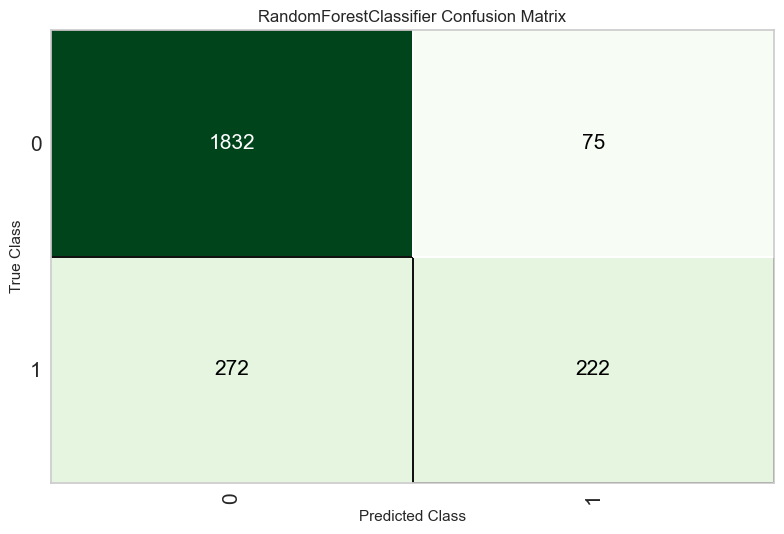

In [59]:
# plot confusion matrix
plot_model(best_model2, plot = 'confusion_matrix')

### ROC (Receiver Operating Characteristic) - Curve 
The ROC provides a comprehensive measure of the model’s performance across various classification thresholds. The plot shows the relationship of the true positive rate against the false positive rate (TPR and FPR). An area under the curve of 0,8 means that a randomly selected case from the group being a churner (having a value of 1) has a score larger than that for a randomly selected case from the group who is not a churner (having a value of 0) in 80% of the time. When there is a perfect separation of the two groups (no overlapping of the distributions), the area under the curve reaches to 1. In other words, the closer the graph is to the top and left-hand borders, the more accurate the test (and the closer the graph is to the diagonal, the less accurate the test). 


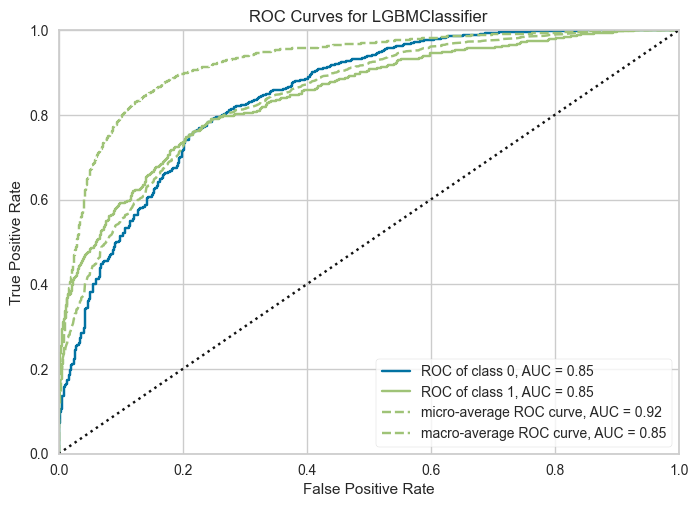

In [60]:
# plot AUC
plot_model(best_model3, plot = 'auc')

### Feature Importance Ranking for Predictive Model Performance
The plot indicates the relative importance of different features in a predictive model. 'Balance' is the most influential feature, followed by 'EstimatedSalary' and 'CreditScore', suggesting these factors are key in the model's decisions. Lesser importance is attributed to 'HasCrCard', 'Gender', and 'IsActiveMember', indicating they have a smaller impact on the model's predictions.

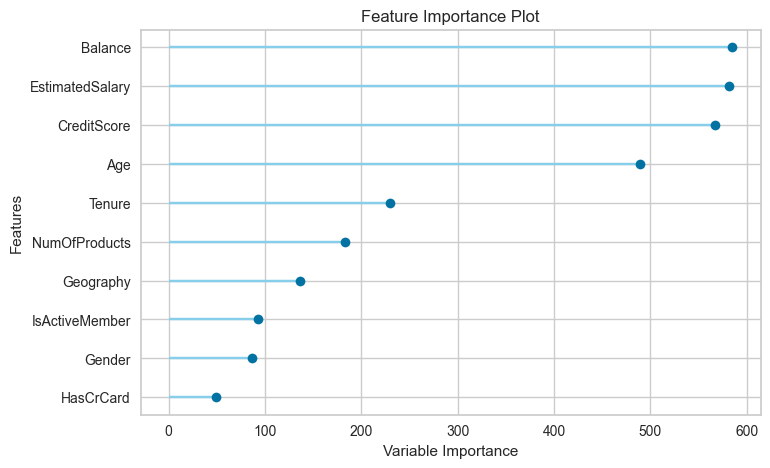

In [76]:
# plot feature importance
plot_model(best_model3, plot = 'feature')

In [62]:
evaluate_model(best_model2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [31]:
#Prediction

In [63]:
# predict on test set
holdout_pred = predict_model(best_model3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8521,0.8451,0.4858,0.7038,0.5749,0.4890,0.5013


In [64]:
# show predictions df
holdout_pred.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,prediction_label,prediction_score
4512,527,Germany,Female,30.0,6,126663.507812,1,1.0,1.0,162267.906250,0,0,0.6375
291,679,France,Female,43.0,4,0.000000,3,1.0,0.0,115136.507812,1,1,0.8481
4564,651,France,Female,33.0,1,96834.781250,1,1.0,0.0,108764.687500,0,0,0.9580
7247,629,Germany,Female,37.0,1,35549.808594,2,0.0,0.0,49676.328125,0,0,0.9405
3210,684,France,Male,33.0,4,140700.609375,1,1.0,0.0,103557.929688,0,0,0.9546


In [65]:
new_data = df.copy()
new_data.drop('Exited', axis=1, inplace=True)
new_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10


In [66]:
# predict model on new_data
predictions = predict_model(best_model3, data = new_data)
predictions.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,prediction_label,prediction_score
0,619,France,Female,42.0,2,0.000000,1,1.0,1.0,101348.882812,0,0.6272
1,608,Spain,Female,41.0,1,83807.859375,1,0.0,1.0,112542.578125,0,0.8424
2,502,France,Female,42.0,8,159660.796875,3,1.0,0.0,113931.570312,1,0.9786
3,699,France,Female,39.0,1,0.000000,2,0.0,0.0,93826.632812,0,0.9438
4,850,Spain,Female,43.0,2,125510.820312,1,NaN,1.0,79084.101562,0,0.9278


In [69]:
# save pipeline
save_model(best_model2, 'churn_modelling_pipeline_v3')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['CreditScore', 'Age', 'Tenure',
                                              'Balance', 'NumOfProducts',
                                              'HasCrCard', 'IsActiveMember',
                                              'EstimatedSalary'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose...
          

## Churn Prediction Pipeline Workflow Overview
The image result represents the structure of this pipeline, revealing that it sequentially applies numerical and categorical imputation (SimpleImputer), encodes ordinal features (OrdinalEncoder), applies one-hot encoding to categorical variables (OneHotEncoder), and finally uses a Random Forest Machine for classification. 

In [70]:
# load pipeline
loaded_best_pipeline = load_model('churn_modelling_pipeline_v3')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\Suha\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['CreditScore', 'Age', 'Tenure',
                                             'Balance', 'NumOfProducts',
                                             'HasCrCard', 'IsActiveMember',
                                             'EstimatedSalary'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              mis...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)